<a href="https://colab.research.google.com/github/mqquiroz/ICV411/blob/main/Hardy_Cross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hidráulica ICV-411
##Universidad Católica del Maule

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
from IPython.display import Image

In [3]:
uploaded = files.upload()

Saving Picture1.png to Picture1.png
Saving Picture2.png to Picture2.png
Saving Picture3.png to Picture3.png


###Ejercicio Redes Cerradas: Hardy Cross

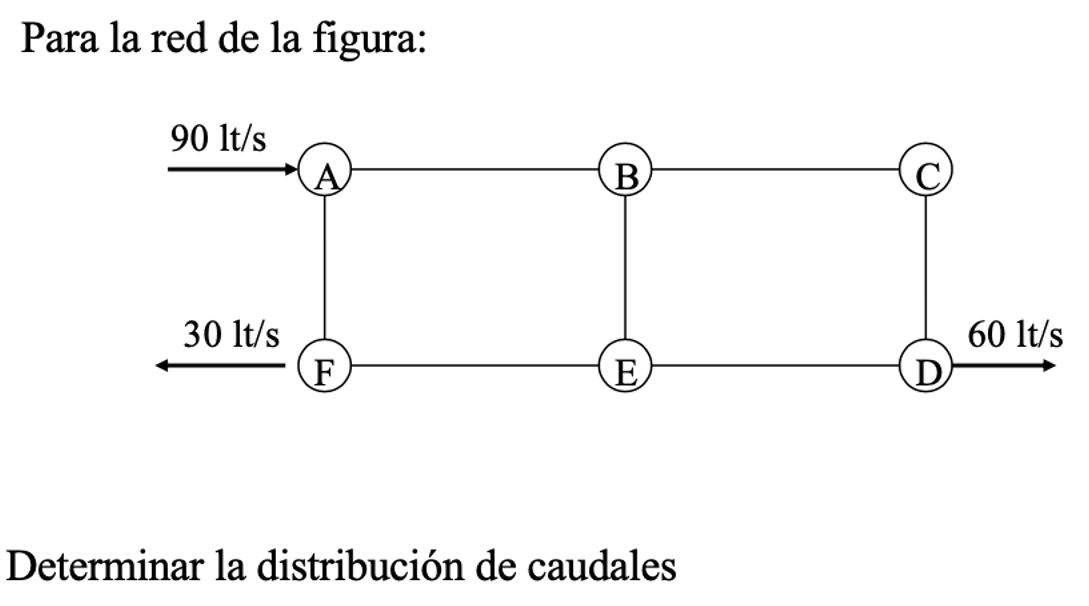

In [4]:
Image('Picture1.png', width = 450)

Datos de cada tubería:

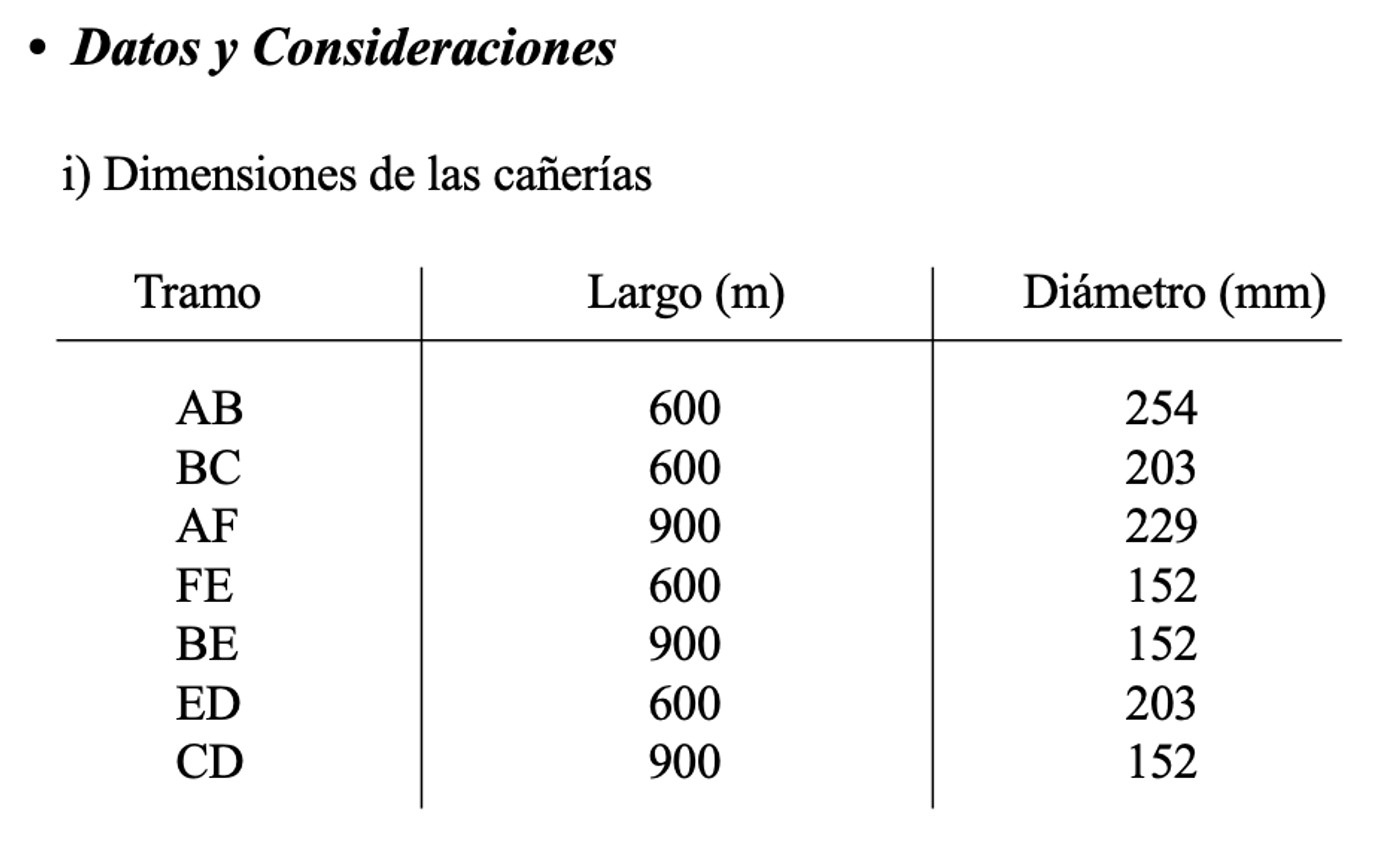

In [5]:
Image('Picture2.png', width = 450)

Distribución inicial de caudales (asumida):

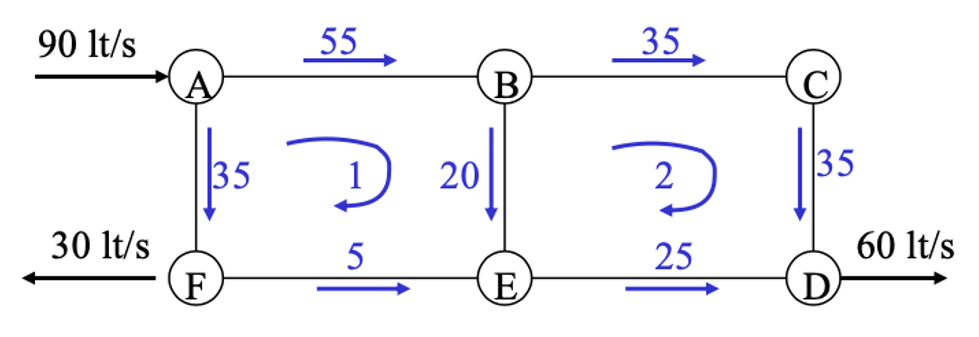

In [6]:
Image('Picture3.png', width = 450)

###Iteracion 1



In [ ]:
#Interacion 1

#Circuito 1
df_C1 = pd.DataFrame()

df_C1['Tramo'] = ['AB','BE','EF','FA']
df_C1['L'] = [600,900,600,900]
df_C1['D'] = (1/1000)*np.array([254,152,152,229])


df_C1['k'] = 0.002129* df_C1['L']/ (df_C1['D']**4.87)
df_C1['Q'] = (1/1000)*np.array([55,20,-5,-35])
df_C1['dH'] = np.sign(df_C1['Q'])*df_C1['k']*(np.abs(df_C1['Q'])**1.85)
df_C1['p|dh/Q|'] = 1.85*(df_C1['dH']/df_C1['Q'])

display('Circuito 1',df_C1)
dQ_C1_it1 = - np.sum(df_C1['dH'])/np.sum(df_C1['p|dh/Q|'])
print('dH_C1: ',np.sum(df_C1['dH']))
print('dQ_C1: ',dQ_C1_it1)

'Circuito 1'

,Tramo,L,D,k,Q,dH,p|dh/Q|
0,AB,600,0.254,1011.082775,0.055,4.725608,158.952267
1,BE,900,0.152,18485.870128,0.020,13.296747,1229.949053
2,EF,600,0.152,12323.913419,-0.005,-0.682092,252.374151
3,FA,900,0.229,2511.998478,-0.035,-5.087978,268.935998


dH_C1:  12.252283812487313
dQ_C1:  -0.006414098132446914


In [ ]:
#Circuito 2
df_C2 = pd.DataFrame()

df_C2['Tramo'] = ['BC','CD','DE','EB']
df_C2['L'] = [600,900,600,900]
df_C2['D'] = (1/1000)*np.array([203,152,203,152])

df_C2['k'] = 0.002129* df_C2['L']/ (df_C2['D']**4.87)
df_C2['Q'] = (1/1000)*np.array([35,35,-25,-20])

df_C2['dH'] = np.sign(df_C2['Q'])*df_C2['k']*(np.abs(df_C2['Q'])**1.85)
df_C2['p|dh/Q|'] = 1.85*(df_C2['dH']/df_C2['Q'])

display('Circuito 2',df_C2)
dQ_C2_it1 = - np.sum(df_C2['dH'])/np.sum(df_C2['p|dh/Q|'])
print('dH_C2: ',np.sum(df_C2['dH']))
print('dQ_C2: ',dQ_C2_it1)

'Circuito 2'

,Tramo,L,D,k,Q,dH,p|dh/Q|
0,BC,600,0.203,3011.765868,0.035,6.100242,322.441382
1,CD,900,0.152,18485.870128,0.035,37.442581,1979.107860
2,DE,600,0.203,3011.765868,-0.025,-3.273484,242.237816
3,EB,900,0.152,18485.870128,-0.020,-13.296747,1229.949053


dH_C2:  26.972592976737182
dQ_C2:  -0.007147450744792724


###Iteración 2

In [ ]:
#Circuito 1 - Iteracion 2
df_C1['Q'] = df_C1['Q'] + dQ_C1_it1
df_C1.loc[1, 'Q'] = df_C1.loc[1, 'Q'] - dQ_C2_it1

df_C1['dH'] = np.sign(df_C1['Q'])*df_C1['k']*(np.abs(df_C1['Q'])**1.85)
df_C1['p|dh/Q|'] = 1.85*(df_C1['dH']/df_C1['Q'])

display('Circuito 1 - Iteracion 2',df_C1)
dQ_C1_it2 = - np.sum(df_C1['dH'])/np.sum(df_C1['p|dh/Q|'])
print('dH_C1: ',np.sum(df_C1['dH']))
print('dQ_C1: ',dQ_C1_it2)


'Circuito 1 - Iteracion 2'

,Tramo,L,D,k,Q,dH,p|dh/Q|
0,AB,600,0.254,1011.082775,0.048586,3.756909,143.051419
1,BE,900,0.152,18485.870128,0.020733,14.212764,1268.179503
2,EF,600,0.152,12323.913419,-0.011414,-3.140622,509.032755
3,FA,900,0.229,2511.998478,-0.041414,-6.946140,310.289498


dH_C1:  7.88291105475799
dQ_C1:  -0.0035340610319122947


In [ ]:
#Circuito 2 - Iteracion 2
df_C2['Q'] = df_C2['Q'] + dQ_C2_it1
df_C2.loc[3, 'Q'] = df_C2.loc[3, 'Q'] - dQ_C1_it1

df_C2['dH'] = np.sign(df_C2['Q'])*df_C2['k']*(np.abs(df_C2['Q'])**1.85)
df_C2['p|dh/Q|'] = 1.85*(df_C2['dH']/df_C2['Q'])

display('Circuito 2 - Iteracion 2',df_C2)
dQ_C2_it2 = - np.sum(df_C2['dH'])/np.sum(df_C2['p|dh/Q|'])
print('dH_C2: ',np.sum(df_C2['dH']))
print('dQ_C2: ',dQ_C2_it2)

'Circuito 2 - Iteracion 2'

,Tramo,L,D,k,Q,dH,p|dh/Q|
0,BC,600,0.203,3011.765868,0.027853,3.997803,265.538895
1,CD,900,0.152,18485.870128,0.027853,24.538051,1629.846988
2,DE,600,0.203,3011.765868,-0.032147,-5.212455,299.962866
3,EB,900,0.152,18485.870128,-0.020733,-14.212764,1268.179503


dH_C2:  9.110634809545365
dQ_C2:  -0.0026304491100914264


###Iteración 3

In [ ]:
#Circuito 1 - Iteracion 3
df_C1['Q'] = df_C1['Q'] + dQ_C1_it2
df_C1.loc[1, 'Q'] = df_C1.loc[1, 'Q'] - dQ_C2_it2

df_C1['dH'] = np.sign(df_C1['Q'])*df_C1['k']*(np.abs(df_C1['Q'])**1.85)
df_C1['p|dh/Q|'] = 1.85*(df_C1['dH']/df_C1['Q'])

display('Circuito 1 - Iteracion 3',df_C1)
dQ_C1_it3 = - np.sum(df_C1['dH'])/np.sum(df_C1['p|dh/Q|'])
print('dH_C1: ',np.sum(df_C1['dH']))
print('dQ_C1: ',dQ_C1_it3)

'Circuito 1 - Iteracion 3'

,Tramo,L,D,k,Q,dH,p|dh/Q|
0,AB,600,0.254,1011.082775,0.045052,3.267043,134.157235
1,BE,900,0.152,18485.870128,0.019830,13.088094,1221.043415
2,EF,600,0.152,12323.913419,-0.014948,-5.172922,640.206270
3,FA,900,0.229,2511.998478,-0.044948,-8.082327,332.656661


dH_C1:  3.0998891573179908
dQ_C1:  -0.001331531141181304


In [ ]:
#Circuito 2 - Iteracion 3
df_C2['Q'] = df_C2['Q'] + dQ_C2_it2
df_C2.loc[3, 'Q'] = df_C2.loc[3, 'Q'] - dQ_C1_it2

df_C2['dH'] = np.sign(df_C2['Q'])*df_C2['k']*(np.abs(df_C2['Q'])**1.85)
df_C2['p|dh/Q|'] = 1.85*(df_C2['dH']/df_C2['Q'])

display('Circuito 2 - Iteracion 3',df_C2)
dQ_C2_it3 = - np.sum(df_C2['dH'])/np.sum(df_C2['p|dh/Q|'])
print('dH_C2: ',np.sum(df_C2['dH']))
print('dQ_C2: ',dQ_C2_it3)

'Circuito 2 - Iteracion 3'

,Tramo,L,D,k,Q,dH,p|dh/Q|
0,BC,600,0.203,3011.765868,0.025222,3.327488,244.065838
1,CD,900,0.152,18485.870128,0.025222,20.423737,1498.047847
2,DE,600,0.203,3011.765868,-0.034778,-6.028821,320.701348
3,EB,900,0.152,18485.870128,-0.019830,-13.088094,1221.043415


dH_C2:  4.634309283974829
dQ_C2:  -0.0014112390524288914


###Iteracion 4

In [ ]:
#Circuito 1 - Iteracion 4
df_C1['Q'] = df_C1['Q'] + dQ_C1_it3
df_C1.loc[1, 'Q'] = df_C1.loc[1, 'Q'] - dQ_C2_it3

df_C1['dH'] = np.sign(df_C1['Q'])*df_C1['k']*(np.abs(df_C1['Q'])**1.85)
df_C1['p|dh/Q|'] = 1.85*(df_C1['dH']/df_C1['Q'])

display('Circuito 1 - Iteracion 4',df_C1)
dQ_C1_it4 = - np.sum(df_C1['dH'])/np.sum(df_C1['p|dh/Q|'])
print('dH_C1: ',np.sum(df_C1['dH']))
print('dQ_C1: ',dQ_C1_it4)

'Circuito 1 - Iteracion 4'

,Tramo,L,D,k,Q,dH,p|dh/Q|
0,AB,600,0.254,1011.082775,0.043720,3.090656,130.779353
1,BE,900,0.152,18485.870128,0.019909,13.185587,1225.214064
2,EF,600,0.152,12323.913419,-0.016280,-6.057508,688.366275
3,FA,900,0.229,2511.998478,-0.046280,-8.530838,341.014604


dH_C1:  1.6878974266551054
dQ_C1:  -0.000707602756171852


In [ ]:
#Circuito 2 - Iteracion 4
df_C2['Q'] = df_C2['Q'] + dQ_C2_it3
df_C2.loc[3, 'Q'] = df_C2.loc[3, 'Q'] - dQ_C1_it3

df_C2['dH'] = np.sign(df_C2['Q'])*df_C2['k']*(np.abs(df_C2['Q'])**1.85)
df_C2['p|dh/Q|'] = 1.85*(df_C2['dH']/df_C2['Q'])

display('Circuito 2 - Iteracion 4',df_C2)
dQ_C2_it4 = - np.sum(df_C2['dH'])/np.sum(df_C2['p|dh/Q|'])
print('dH_C2: ',np.sum(df_C2['dH']))
print('dQ_C2: ',dQ_C2_it4)

'Circuito 2 - Iteracion 4'

,Tramo,L,D,k,Q,dH,p|dh/Q|
0,BC,600,0.203,3011.765868,0.023811,2.991267,232.408374
1,CD,900,0.152,18485.870128,0.023811,18.360049,1426.495685
2,DE,600,0.203,3011.765868,-0.036189,-6.489197,331.729770
3,EB,900,0.152,18485.870128,-0.019909,-13.185587,1225.214064


dH_C2:  1.6765313176093262
dQ_C2:  -0.0005213341468524601


###Iteracion 5

In [ ]:
#Circuito 1 - Iteracion 5
df_C1['Q'] = df_C1['Q'] + dQ_C1_it4
df_C1.loc[1, 'Q'] = df_C1.loc[1, 'Q'] - dQ_C2_it4

df_C1['dH'] = np.sign(df_C1['Q'])*df_C1['k']*(np.abs(df_C1['Q'])**1.85)
df_C1['p|dh/Q|'] = 1.85*(df_C1['dH']/df_C1['Q'])

display('Circuito 1 - Iteracion 5',df_C1)
dQ_C1_it5 = - np.sum(df_C1['dH'])/np.sum(df_C1['p|dh/Q|'])
print('dH_C1: ',np.sum(df_C1['dH']))
print('dQ_C1: ',dQ_C1_it5)

'Circuito 1 - Iteracion 5'

,Tramo,L,D,k,Q,dH,p|dh/Q|
0,AB,600,0.254,1011.082775,0.043013,2.998753,128.978018
1,BE,900,0.152,18485.870128,0.019723,12.958276,1215.463785
2,EF,600,0.152,12323.913419,-0.016987,-6.553576,713.716799
3,FA,900,0.229,2511.998478,-0.046987,-8.773708,345.441462


dH_C1:  0.6297454432496981
dQ_C1:  -0.00026200092634860055


In [ ]:
#Circuito 2 - Iteracion 5
df_C2['Q'] = df_C2['Q'] + dQ_C2_it4
df_C2.loc[3, 'Q'] = df_C2.loc[3, 'Q'] - dQ_C1_it4

df_C2['dH'] = np.sign(df_C2['Q'])*df_C2['k']*(np.abs(df_C2['Q'])**1.85)
df_C2['p|dh/Q|'] = 1.85*(df_C2['dH']/df_C2['Q'])

display('Circuito 2 - Iteracion 5',df_C2)
dQ_C2_it5 = - np.sum(df_C2['dH'])/np.sum(df_C2['p|dh/Q|'])
print('dH_C2: ',np.sum(df_C2['dH']))
print('dQ_C2: ',dQ_C2_it5)

'Circuito 2 - Iteracion 5'

,Tramo,L,D,k,Q,dH,p|dh/Q|
0,BC,600,0.203,3011.765868,0.023290,2.871233,228.075955
1,CD,900,0.152,18485.870128,0.023290,17.623296,1399.903802
2,DE,600,0.203,3011.765868,-0.036710,-6.663197,335.787418
3,EB,900,0.152,18485.870128,-0.019723,-12.958276,1215.463785


dH_C2:  0.8730553888260832
dQ_C2:  -0.00027461213092001905


###Iteración 6

In [ ]:
#Circuito 1 - Iteracion 6
df_C1['Q'] = df_C1['Q'] + dQ_C1_it5
df_C1.loc[1, 'Q'] = df_C1.loc[1, 'Q'] - dQ_C2_it5

df_C1['dH'] = np.sign(df_C1['Q'])*df_C1['k']*(np.abs(df_C1['Q'])**1.85)
df_C1['p|dh/Q|'] = 1.85*(df_C1['dH']/df_C1['Q'])

display('Circuito 1 - Iteracion 6',df_C1)
dQ_C1_it6 = - np.sum(df_C1['dH'])/np.sum(df_C1['p|dh/Q|'])
print('dH_C1: ',np.sum(df_C1['dH']))
print('dQ_C1: ',dQ_C1_it6)

'Circuito 1 - Iteracion 6'

,Tramo,L,D,k,Q,dH,p|dh/Q|
0,AB,600,0.254,1011.082775,0.042751,2.965048,128.309921
1,BE,900,0.152,18485.870128,0.019736,12.973609,1216.124356
2,EF,600,0.152,12323.913419,-0.017249,-6.741796,723.062756
3,FA,900,0.229,2511.998478,-0.047249,-8.864428,347.078031


dH_C1:  0.33243355860457235
dQ_C1:  -0.00013767787278310518


In [ ]:
#Circuito 2 - Iteracion 6
df_C2['Q'] = df_C2['Q'] + dQ_C2_it5
df_C2.loc[3, 'Q'] = df_C2.loc[3, 'Q'] - dQ_C1_it5

df_C2['dH'] = np.sign(df_C2['Q'])*df_C2['k']*(np.abs(df_C2['Q'])**1.85)
df_C2['p|dh/Q|'] = 1.85*(df_C2['dH']/df_C2['Q'])

display('Circuito 2 - Iteracion 6',df_C2)
dQ_C2_it6 = - np.sum(df_C2['dH'])/np.sum(df_C2['p|dh/Q|'])
print('dH_C2: ',np.sum(df_C2['dH']))
print('dQ_C2: ',dQ_C2_it6)

'Circuito 2 - Iteracion 6'

,Tramo,L,D,k,Q,dH,p|dh/Q|
0,BC,600,0.203,3011.765868,0.023015,2.808915,225.788023
1,CD,900,0.152,18485.870128,0.023015,17.240793,1385.860741
2,DE,600,0.203,3011.765868,-0.036985,-6.755702,337.921299
3,EB,900,0.152,18485.870128,-0.019736,-12.973609,1216.124356


dH_C2:  0.32039710246061404
dQ_C2:  -0.00010120910615562582


In [ ]:
print(1000*df_C1['Q'])
print(1000*df_C2['Q'])

0    42.750706
1    19.735791
2   -17.249294
3   -47.249294
Name: Q, dtype: float64
0    23.014915
1    23.014915
2   -36.985085
3   -19.735791
Name: Q, dtype: float64
